# Aplicación de Inteligencia Artificial

Hellen Aguilar Noguera

José Leonardo Araya Parajeles

*Universidad CENFOTEC*

# Clasificación binaria con Perceptrón simple usando dataset Iris

# Se realizan las importaciones requeridas

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd


# Se cargar el dataset y además realizamos la exploracion del dataset Iris

In [ ]:
# Cargar el dataset Iris desde UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Asignar nombres a columnas, los cuales corresponde al la longitud, el ancho, del sépalo, la longitud y ancho del pétalo y finalmente la clase o especie,
# Para nuestro caso la Especie de Iris a la que pertenece la flor (Iris-setosa, Iris-versicolor, Iris-virginica).
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

# Mostrar primeros registros del dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Análisis de los resltados:

Se logra identificar rápidamente patrones visuales importantes como:

###La concentración o dispersión de los valores.
###Relaciones claras entre características (que serán útiles posteriormente para clasificación).
###Confirmar que los datos han sido cargados y estructurados correctamente.

Es importante indicar que estos gráficas proporcionan una visión general inicial, que facilita el posterior desarrollo de modelos de machine learning (como mi perceptrón), identificando claramente cómo se distribuyen y relacionan los datos antes de iniciar el proceso de entrenamiento.

# Preparación de datos para clasificación binaria

In [ ]:
# Se filtran y se seleccionan solo dos clases para clasificación binaria: Setosa y Versicolor
df_binary = df[df['class'].isin(['Iris-setosa', 'Iris-versicolor'])].copy()

# La función .copy() es usada para crear una copia independiente del dataset filtrado y evitar advertencias en pandas al modificar el dataframe original.

# Cambiar etiquetas de clase a valores numéricos (Setosa=0, Versicolor=1),
# Esto transforma las etiquetas categóricas en valores numéricos: Iris-setosa → 0 Iris-versicolor → 1
df_binary['class'] = df_binary['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Separar en características (X) y etiquetas (y) X (características): contiene las primeras cuatro columnas (longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo).
# y (etiquetas): contiene la última columna (clase numérica, 0 o 1).
X = df_binary.iloc[:, :-1].values
y = df_binary.iloc[:, -1].values

# Mostrar el tamaño de los datos
print(f"Tamaño dataset: {X.shape}")

# Si tengo 100 registros y 4 características (largo y ancho del sépalo y pétalo) para realizar la clasificación binaria.


Tamaño dataset: (100, 4)


# Análsis de los resultados de la preparación de datos.

Se realizó exitosamente una transformación del dataset original (con 3 especies de Iris) a un dataset para una clasificación binaria (tal como se solicita en el enunciado del proyecto 2) que incluye únicamente las clases "Setosa" y "Versicolor", esto se realizó porque dichas clases son las que tienen una separación más clara.

# Es importante resaltar que se convirtieron etiquetas categóricas a numéricas, asignando:
0: Iris-setosa
1: Iris-versicolor

El nuevo dataset tiene 100 registros y 4 características (longitud y ancho del sépalo, longitud y ancho del pétalo).

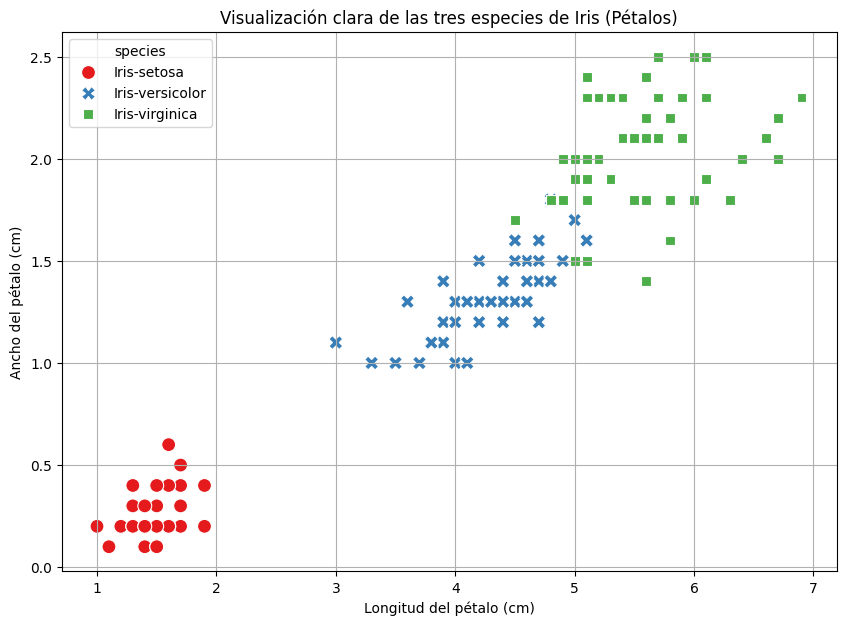

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd

# Dataset Iris directamente desde URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# Visualización de las tres especies
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='petal_length',
    y='petal_width',
    hue='species',
    data=df,
    palette='Set1',
    style='species',
    s=100
)

plt.title('Visualización clara de las tres especies de Iris (Pétalos)')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.grid(True)
plt.show()

# Resultados encontrados:

## * Iris-setosa (En Rojo) claramente separada y agrupada abajo a la izquierda (pétalos más pequeños).

## * Iris-versicolor (Azúl) en posición intermedia, separada relativamente clara pero más cercana a Iris-virginica.

## * Iris-virginica (La del color verde) con pétalos más grandes arriba a la derecha.

#### En la gráfica se puede apreciar claramente cómo las especies Iris-setosa e Iris-versicolor son las que más fácilmente se pueden separar utilizando un perceptrón, ya que tienen una frontera clara.

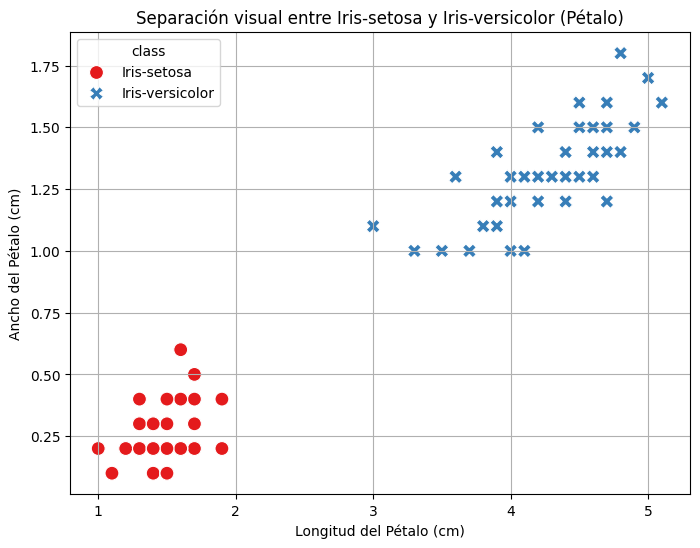

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd

# use 'clase' como nombre de columna para ser coherente con las operaciones de filtrado posteriormente en el código
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

# Filtrar solo Setosa y Versicolor
df_binary = df[df['class'].isin(['Iris-setosa', 'Iris-versicolor'])]


# Crear gráfica de dispersión usando características clave (pétalos)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='petal_length',
    y='petal_width',
    hue='class',
    data=df_binary,
    palette='Set1',
    style='class',
    s=100
)

plt.title('Separación visual entre Iris-setosa y Iris-versicolor (Pétalo)')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.grid(True)
plt.show()


## En conclusión:
Esta separación visual clara es la que se necesita para el uso de estas dos clases para entrenar un perceptrón en una tarea de clasificación binaria.

# División de los conjuntos de entrenamiento y prueba

In [ ]:
# Dividir los datos en entrenamiento (80% para que el modelo aprenda los patrones) y prueba (20% será usado para evaluar qué tan bien está el modelo)
from sklearn.model_selection import train_test_split

# random_state=42 La división entrenamiento-prueba generalmente ocurre al azar (aleatoriamente). Si no se especifica el valor random_state, cada vez habrá diferentes conjuntos de entrenamiento y prueba al ejecutar el código nuevamente.
#Al definir explícitamente random_state=42 (puedes usar cualquier número, pero 42 es comúnmente utilizado por convención)
# Por lo que random_state=42 permite comparar consistentemente los resultados de diferentes pruebas o experimentos.

# Cada ejecución será diferente (X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar tamaños conjuntos
print(f"Datos entrenamiento: {X_train.shape}")
print(f"Datos prueba: {X_test.shape}")


Datos entrenamiento: (80, 4)
Datos prueba: (20, 4)


# Análisis de los resultados:

Se dividió de forma correcta el dataset binario en dos conjuntos:

###Entrenamiento (80%): 80 muestras que utilizarás para que el perceptrón "aprenda" a diferenciar entre las dos especies.

###Prueba (20%): 20 muestras con las cuales evaluará la capacidad del perceptrón para generalizar y predecir correctamente.

* Por lo que se puede concluir que la eleccion 80-20 permite tener suficientes datos para entrenar mientras se mantiene un conjunto representativo para pruebas.

* Explicación de random_state=42: indicar brevemente que esto garantiza reproducibilidad (siempre se obtiene la misma división cada vez que se ejecuta el código).

Esta división permite evaluar si el modelo es capaz de predecir bien con datos que nunca antes ha visto, simulando su uso en un escenario real.

# Definición del perceptrón simple desde cero sin uso de librerias.

### El perceptrón consta de:

### * Épocas (epochs): Número de veces que el algoritmo revisará el conjunto de datos para ajustar sus parámetros (pesos y bias).

### * Pesos (weights) y sesgo (bias): Parámetros del perceptrón que se ajustan durante el entrenamiento para aprender a clasificar correctamente.

### * Función de activación (step):
Devuelve:
0 si la salida lineal es negativa.
1 si la salida lineal es positiva o cero.

In [ ]:
# Creación del perceptrón simple desde cero
class PerceptronSimple:
    def __init__(self, epochs=100):
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Función de activación step
    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    # Entrenar perceptrón
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Aquí se inicializan pesos y sesgo en cero.
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_function(linear_output)
                update = y[idx] - y_pred
                self.weights += update * x_i
                self.bias += update

        print("Entrenamiento completado")

    # Predicción del perceptrón
    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)



Entrenamiento del perceptrón

In [ ]:
# Inicializar y entrenar el perceptrón
perceptron = PerceptronSimple()
perceptron.fit(X_train, y_train)


Entrenamiento completado


In [ ]:
# Entrenamos el perceptrón por defecto con 100 épocas
perceptron = PerceptronSimple(epochs=100)

# Ajuste automático de pesos y sesgo según datos de entrenamiento
perceptron.fit(X_train, y_train)

# Evaluación del modelo en datos no vistos durante entrenamiento (prueba)
y_pred = perceptron.predict(X_test)

# Calculamos precisión del perceptrón (porcentaje de aciertos)
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del Perceptrón simple: {accuracy * 100:.2f}%")


Entrenamiento completado
Precisión del Perceptrón simple: 100.00%


Evaluación del perceptrón

In [ ]:
# Evaluar precisión del perceptrón
y_pred = perceptron.predict(X_test)

# Calcular precisión del modelo
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del Perceptrón simple: {accuracy * 100:.2f}%")


Precisión del Perceptrón simple: 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Reporte de métricas
report = classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor'])
print("Reporte de clasificación:\n", report)


Matriz de Confusión:
 [[12  0]
 [ 0  8]]
Reporte de clasificación:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



* Hay 12 muestras de Iris-setosa y 8 de Iris-versicolor en el conjunto de prueba (20 muestras en total).

* No hay falsos positivos ni falsos negativos: todas las muestras fueron clasificadas correctamente.

- **Precision, recall y F1-score:** Todas las métricas son 1.00 para ambas clases, lo que indica un rendimiento perfecto.
- **Accuracy:** Confirma el 100% de precisión global.

# Conclusión:

### El perceptrón simple implementado clasifica con éxito las clases Iris-setosa e Iris-versicolor del dataset Iris, espro alcanzando una precisión del 100% en el conjunto de prueba, lo que supera el objetivo del 95%. Esto se debe a la naturaleza linealmente separable de las clases seleccionadas, lo que hace que el perceptrón simple sea una herramienta adecuada para este problema. La preparación de datos y la división 80-20 fueron correctas, y el uso de random_state=42 garantiza reproducibilidad.


